# Deaths per Year by Continent

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
data=pd.read_csv('/kaggle/input/continental-deaths-1950-2021/death per year by continent.csv', thousands=',').drop(columns=['Unnamed: 8'])
# fix the column names so they're uniform
data.columns = [item.replace('(UN)', '').strip() for item in data.columns.tolist()]
print(data.columns.tolist())
display(data)

['Years', 'Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania', 'World']


,Years,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania,World
0,1950,6062986,31626510,6473233,2925484,1551914,148.409,48788536
1,1951,6132451,31092766,6609794,2938142,1584821,156.578,48514550
2,1952,6154863,30549918,6265135,2925067,1600065,151.564,47646612
3,1953,6188063,30398354,6220937,2924775,1617795,149160.000,47499084
4,1954,6233523,30052708,6072645,2914769,1578409,150750.000,47002804
...,...,...,...,...,...,...,...,...
67,2017,10694839,30770426,8076159,4104061,3049504,270.970,56965956
68,2018,10763424,30948894,8112356,4190846,3064891,271.264,57351676
69,2019,10840634,31476206,8020246,4257246,3063270,280.924,57938524
70,2020,11390416,33775732,9119281,5066101,3544380,278.401,63174308


That Oceania data looks odd; let's look at it in isolation.

<Axes: >

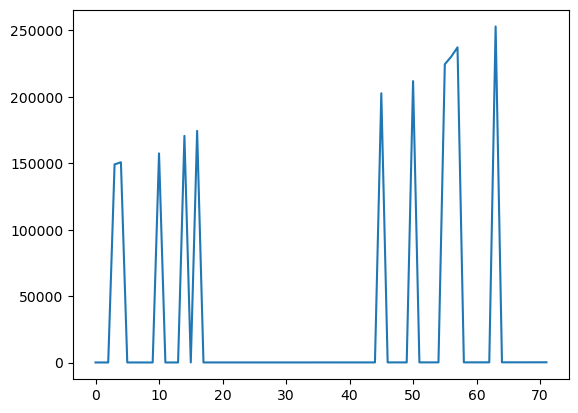

In [3]:
data['Oceania'].plot()

Yeah that's weird. Let's fix that.

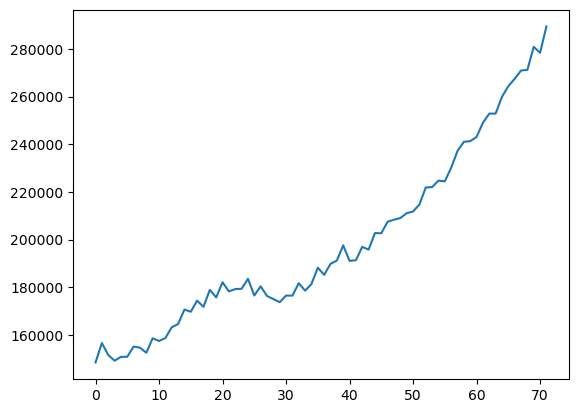

In [4]:
data['Oceania (fixed)'] = data['Oceania'].apply(func=lambda x: int(x) if x > 50000 else int(1000 * x))
data['Oceania (fixed)'].plot()
data = data.drop(columns=['Oceania'])
# now we need to put the columns back in order so World is last
data = data[[item for item in data.columns if item != 'World'] + ['World']]

In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Years                            72 non-null     int64
 1   Africa                           72 non-null     int64
 2   Asia                             72 non-null     int64
 3   Europe                           72 non-null     int64
 4   Latin America and the Caribbean  72 non-null     int64
 5   Northern America                 72 non-null     int64
 6   Oceania (fixed)                  72 non-null     int64
 7   World                            72 non-null     int64
dtypes: int64(8)
memory usage: 4.6 KB


None

In [6]:
cols = data.columns
fig=make_subplots(specs=[[{"secondary_y":False}]])
for col in cols[1:-1]:
    fig.add_trace(go.Scatter(x=data['Years'],y=data[col],name=col),secondary_y=False,)
fig.update_layout(autosize=False,width=900,height=500,title_text="Deaths per Year by Continent")
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Numbers",secondary_y=False)
fig.show()